# K-means Clustering

Given a training set $X^{(m)}$ and a number of clusters $K$, assign every $x^{(i)} \in R^n$ into corresponding cluster $\mu_k$.

As a first step, every cluster centroid $\mu_k$ is placed by choosing a random $x^{(i)}$.

Secondly, for every $x^{(i)}$ we find a closest cluster centroid $\mu_k$:

$$c_i = min_k ||x^{(i)} - \mu_k||^2$$

Lastly, every cluster centroid $\mu_k$ is moved to a mean of $X_k$, where $c_i = k$:

$$\mu_k = \frac{1}{C_k} \sum_{i \in C_k}{x^{(i)}}$$

These 3 steps above are repeated until convergence, when $\mu_k$ become fixed.

## Data Clustering

In [35]:
# import libs
import sys
sys.path.append("../")

from k_means_clustering import *
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

Find clusters in $R^2$ data set.

In [2]:
# load data
data = scipy.io.loadmat('../data/ex7data2.mat')
x = data['X']
print(x.shape)

(300, 2)


In [3]:
number_of_clusters = 4
clusters, centroids = find_clusters(x, number_of_clusters)

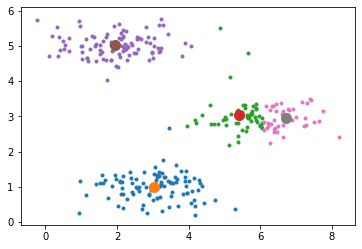

In [4]:
# plot data
for k in range(number_of_clusters):
    plt.scatter(x[clusters == k, 0], x[clusters == k, 1], marker=".")
    plt.scatter(centroids[k, 0], centroids[k, 1], marker="o", s=100)
plt.show()

## Image Compression

Load 128 x 128 image where each pixes is represented in 3 x 1 RGB vector.

Original image takes 128\*128\*3\*8 bits = 48 kB in memory.

In [61]:
# load image
image_data = scipy.io.loadmat('../data/bird_small.mat')['A']
print(image_data.shape)

(128, 128, 3)


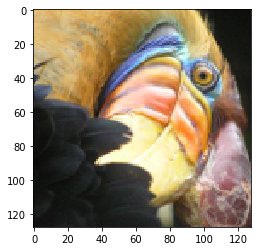

In [62]:
# plot image
plt.imshow(image_data)
plt.show()

Represent image data as 128\*128 x 3 matrix and clusterize image colors.

In [63]:
number_of_colors = 8

In [64]:
# find image color clusters
image_vector = image_data.reshape((image_data.shape[0] * image_data.shape[1], image_data.shape[2]))

color_clusters, color_cluster_centroids = find_clusters(image_vector, number_of_colors)

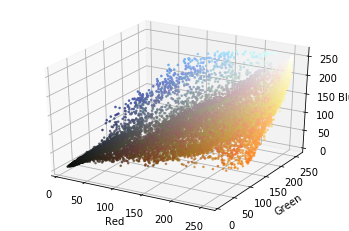

In [65]:
# plot image color in 3d
def plot_image_colors_3d(color_data, point_size=10):
    ax = plt.axes(projection="3d")
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.scatter(color_data[:, 0], color_data[:, 1], color_data[:, 2], 
               marker=".", c=color_data/255.0, s=point_size)
    plt.show()
    
plot_image_colors_3d(image_vector)

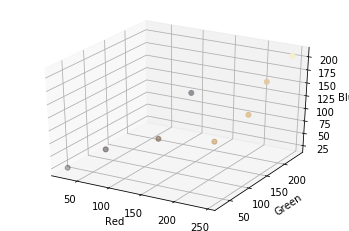

In [66]:
plot_image_colors_3d(color_cluster_centroids, point_size=100)

Reconstructing image using color clusters. 

Compressed image will take 128\*128\*4 + 8\*3\*8 bits =~ 8 kB in memory.

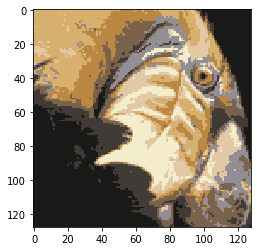

In [67]:
# reconstruct image
rec_image = color_cluster_centroids[color_clusters]
image_side = int(math.sqrt(rec_image.shape[0]))
rec_image = rec_image.reshape((image_side, image_side, rec_image.shape[1])).astype(int)

plt.imshow(rec_image)
plt.show()